## POS TAGGING
#### Using a Tagger

A part-of-speech tagger, or POS-tagger, processes a sequence of words, and attaches a part of speech tag to each word (don't forget to import nltk):

In [3]:
import nltk
from nltk.tokenize import word_tokenize
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

Here we see that and is CC, a coordinating conjunction; now and completely are RB, or adverbs; for is IN, a preposition; something is NN, a noun; and different is JJ, an adjective

In [4]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

Notice that refuse and permit both appear as a present tense verb (VBP) and a noun (NN). E.g. refUSE is a verb meaning "deny," while REFuse is a noun meaning "trash" (i.e. they are not homophones). Thus, we need to know which word is being used in order to pronounce the text correctly. (For this reason, text-to-speech systems usually perform POS-tagging.)

In [6]:
nltk.download('brown')

[nltk_data] Downloading package brown to C:\Users\Gaurav
[nltk_data]     Choube\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

Lexical categories like "noun" and part-of-speech tags like NN seem to have their uses, but the details will be obscure to many readers. You might wonder what justification there is for introducing this extra level of information. Many of these categories arise from superficial analysis the distribution of words in text. Consider the following analysis involving woman (a noun), bought (a verb), over (a preposition), and the (a determiner). The text.similar() method takes a word w, finds all contexts w1w w2, then finds all words w' that appear in the same context, i.e. w1w'w2.

In [7]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [8]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [9]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [10]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


Observe that searching for woman finds nouns; searching for bought mostly finds verbs; searching for over generally finds prepositions; searching for the finds several determiners. A tagger can correctly identify the tags on these words in the context of a sentence, e.g. The woman bought over $150,000 worth of clothes.

### Tagged Corpora
####  Representing Tagged Tokens
By convention in NLTK, a tagged token is represented using a tuple consisting of the token and the tag. We can create one of these special tuples from the standard string representation of a tagged token, using the function str2tuple():

In [11]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [12]:
sent = '''
... The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
... other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
... Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
... said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
... accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
... interest/NN of/IN both/ABX governments/NNS ''/'' ./.
... '''

In [14]:
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

In [15]:
nltk.corpus.brown.tagged_words()
[('The', 'AT'), ('Fulton', 'NP-TL'), ...]
nltk.corpus.brown.tagged_words(tagset='universal')
[('The', 'DET'), ('Fulton', 'NOUN'), ...]

[('The', 'DET'), ('Fulton', 'NOUN'), Ellipsis]

Whenever a corpus contains tagged text, the NLTK corpus interface will have a tagged_words() method. Here are some more examples, again using the output format illustrated for the Brown Corpus:

In [17]:
nltk.download('nps_chat')

[nltk_data] Downloading package nps_chat to C:\Users\Gaurav
[nltk_data]     Choube\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\nps_chat.zip.


True

In [19]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to C:\Users\Gaurav
[nltk_data]     Choube\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.


True

In [22]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to C:\Users\Gaurav
[nltk_data]     Choube\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


True

In [23]:
print(nltk.corpus.nps_chat.tagged_words())
nltk.corpus.conll2000.tagged_words()
nltk.corpus.treebank.tagged_words()

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [25]:
nltk.download('sinica_treebank')

[nltk_data] Downloading package sinica_treebank to C:\Users\Gaurav
[nltk_data]     Choube\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sinica_treebank.zip.


True

In [27]:
nltk.download('mac_morpho')

[nltk_data] Downloading package mac_morpho to C:\Users\Gaurav
[nltk_data]     Choube\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\mac_morpho.zip.


True

In [29]:
nltk.download('conll2002')

[nltk_data] Downloading package conll2002 to C:\Users\Gaurav
[nltk_data]     Choube\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2002.zip.


True

In [31]:
nltk.download('cess_cat')

[nltk_data] Downloading package cess_cat to C:\Users\Gaurav
[nltk_data]     Choube\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\cess_cat.zip.


True

In [32]:
nltk.corpus.sinica_treebank.tagged_words()

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

In [35]:
nltk.corpus.conll2002.tagged_words()

[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

In [33]:
nltk.corpus.indian.tagged_words()

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [34]:
nltk.corpus.mac_morpho.tagged_words()

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [36]:
nltk.corpus.cess_cat.tagged_words()

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

> nltk.corpus.indian (POS-Tagged Data from Four Indian Languages: Bangla, Hindi, Marathi, and Telugu)

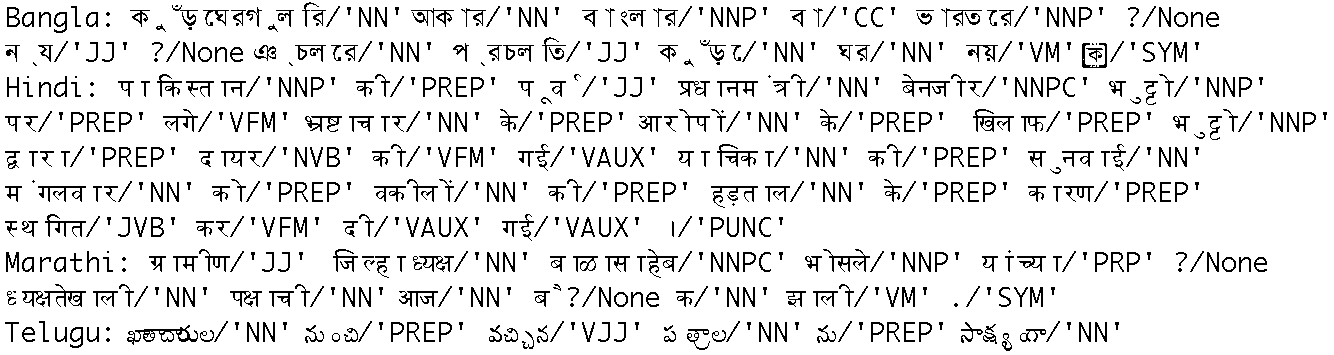



| Tag | Meaning | English Examples |
| --- | --- | --- |
| ADJ | adjective | new, good, high, special, big, local |
|ADP | adposition | on, of, at, with, by, into, under |
| ADV | adverb | really, already, still, early, now |
| CONJ| conjunction | and, or, but, if, while, although |
| DET | determiner | , article the, a, some, most, every, no, which |
| NOUN | noun | year, home, costs, time, Africa |
| NUM | numeral | twenty-four, fourth, 1991, 14:24 | 
| PRT | particle | at, on, out, over per, that, up, with |
| PRON | pronoun | he, their, her, its, my, I, us |
| VERB | verb | is, say, told, given, playing, would |
| dot | punctuation marks | . , ; ! |
| X | other | ersatz, esprit, dunno, gr8, univeristy |

## A Universal Part-of-Speech Tagset

### Nouns

In [41]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to C:\Users\Gaurav
[nltk_data]     Choube\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


True

In [42]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

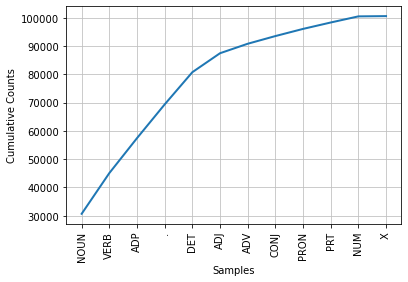

In [43]:
tag_fd.plot(cumulative=True)

In [44]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

> This confirms our assertion that nouns occur after determiners and adjectives, including numeral adjectives (tagged as NUM).

In [49]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'sold',
 'help',
 'including',
 'should',
 'reported',
 'according',
 'pay',
 'compared',
 'being',
 'fell',
 'began',
 'based',
 'used',
 'closed',
 "'re",
 'want',
 'see',
 'took',
 'yield',
 'offered',
 'set',
 'priced',
 'approved',
 'come',
 'noted',
 'cut',
 'ended',
 'found',
 'increased',
 'become',
 'think',
 'named',
 'go',
 'trying',
 'proposed',
 'received',
 'growing',
 'declined',
 'held',
 'give',
 'came',
 'use',
 'put',
 'making',
 'continue',
 'raise',
 'estimated',
 'called',
 'paid',
 'designed',
 'going',
 'expects',
 'seeking',
 'must',
 'plans',
 'wo',
 'increasing',
 'saying',
 'got',
 'owns',
 'trading',
 'acquired',
 'gained',
 'fined',
 'reached',
 'holding',
 'announced',
 'filed',
 'became',


> Note that the items being counted in the frequency distribution are word-tag pairs. Since words and tags are paired, we can treat the word as a condition and the tag as an event, and initialize a conditional frequency distribution with a list of condition-event pairs. This lets us see a frequency-ordered list of tags given a word:

In [47]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [48]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

### Unsimplified Tags

Let's find the most frequent nouns of each noun part-of-speech type. We'll find all tags starting with NN, and provides a few example words for each one. You will see that there are many variants of NN; the most important contain $ for possessive nouns, S for plural nouns (since plural nouns typically end in s) and P for proper nouns. In addition, most of the tags have suffix modifiers: -NC for citations, -HL for words in headlines and -TL for titles (a feature of Brown tags).

In [60]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text 
                                   if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

    tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
    for tag in sorted(tagdict):
        print(tag, tagdict[tag])

#### Exploring Tagged Corpora

Suppose we're studying the word often and want to see how it is used in text. We could ask to see the words that follow often

In [61]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [62]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 
